In [8]:
import pandas as pd
import seaborn as sns

In [45]:
mpg = pd.read_csv('mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [6]:
df_mpg = mpg.groupby('drv', as_index=False).agg(mean_hwy = ('hwy','mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


In [19]:
df_mpg = df_mpg.sort_values('mean_hwy', ascending=False)
df_mpg

,drv,mean_hwy
1,f,28.160377
2,r,21.000000
0,4,19.174757


<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

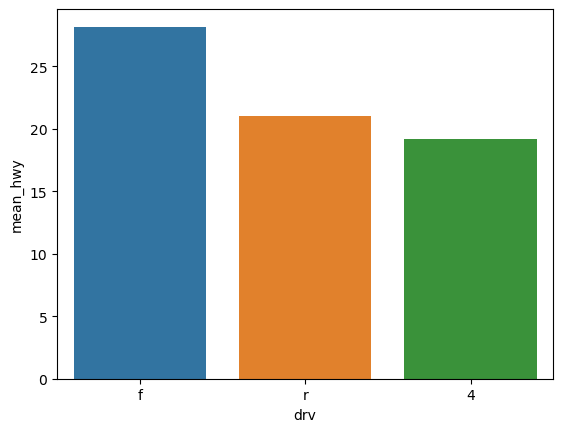

In [20]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

In [26]:
mpg_df = mpg.groupby('drv', as_index=False).agg(count_drv=('drv','count'))
mpg_df

,drv,count_drv
0,4,103
1,f,106
2,r,25


<AxesSubplot:xlabel='drv', ylabel='count_drv'>

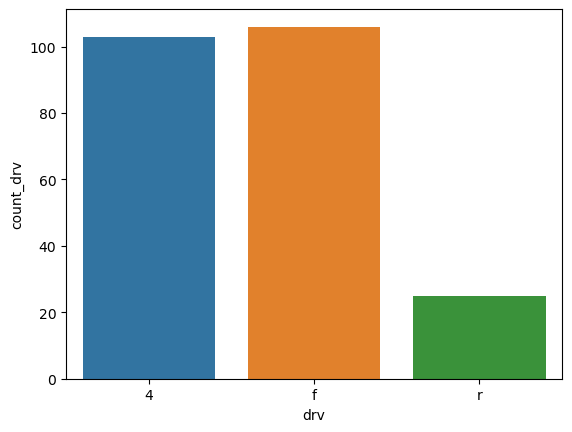

In [27]:
sns.barplot(data=mpg_df, x='drv', y='count_drv')

<AxesSubplot:xlabel='drv', ylabel='count'>

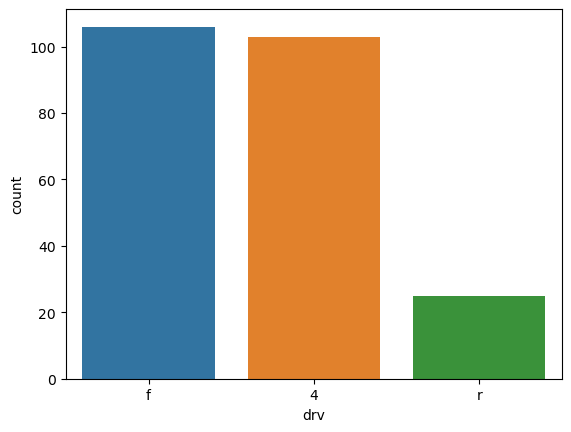

In [31]:
sns.countplot(data=mpg, x='drv')

<AxesSubplot:xlabel='drv', ylabel='count'>

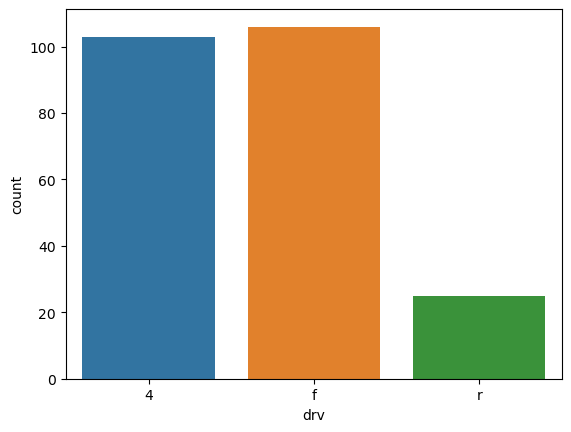

In [30]:
sns.countplot(data=mpg, x='drv', order = ['4', 'f', 'r'])

In [32]:
mpg[['model']].head(20)

,model
0,a4
1,a4
2,a4
3,a4
4,a4
5,a4
6,a4
7,a4 quattro
8,a4 quattro
9,a4 quattro


In [33]:
mpg['model'].unique()

array(['a4', 'a4 quattro', 'a6 quattro', 'c1500 suburban 2wd', 'corvette',
       'k1500 tahoe 4wd', 'malibu', 'caravan 2wd', 'dakota pickup 4wd',
       'durango 4wd', 'ram 1500 pickup 4wd', 'expedition 2wd',
       'explorer 4wd', 'f150 pickup 4wd', 'mustang', 'civic', 'sonata',
       'tiburon', 'grand cherokee 4wd', 'range rover', 'navigator 2wd',
       'mountaineer 4wd', 'altima', 'maxima', 'pathfinder 4wd',
       'grand prix', 'forester awd', 'impreza awd', '4runner 4wd',
       'camry', 'camry solara', 'corolla', 'land cruiser wagon 4wd',
       'toyota tacoma 4wd', 'gti', 'jetta', 'new beetle', 'passat'],
      dtype=object)

In [36]:
mc_mpg = mpg.groupby('model',as_index=False).agg(model_count=('model','count'))
mc_mpg.head(5)

,model,model_count
0,4runner 4wd,6
1,a4,7
2,a4 quattro,8
3,a6 quattro,3
4,altima,6


In [35]:
mc_mpg['model'].unique()

array(['4runner 4wd', 'a4', 'a4 quattro', 'a6 quattro', 'altima',
       'c1500 suburban 2wd', 'camry', 'camry solara', 'caravan 2wd',
       'civic', 'corolla', 'corvette', 'dakota pickup 4wd', 'durango 4wd',
       'expedition 2wd', 'explorer 4wd', 'f150 pickup 4wd',
       'forester awd', 'grand cherokee 4wd', 'grand prix', 'gti',
       'impreza awd', 'jetta', 'k1500 tahoe 4wd',
       'land cruiser wagon 4wd', 'malibu', 'maxima', 'mountaineer 4wd',
       'mustang', 'navigator 2wd', 'new beetle', 'passat',
       'pathfinder 4wd', 'ram 1500 pickup 4wd', 'range rover', 'sonata',
       'tiburon', 'toyota tacoma 4wd'], dtype=object)

In [42]:
mpg['model'].value_counts().head(5).index

Index(['caravan 2wd', 'ram 1500 pickup 4wd', 'civic', 'jetta',
       'dakota pickup 4wd'],
      dtype='object')

<AxesSubplot:xlabel='model', ylabel='count'>

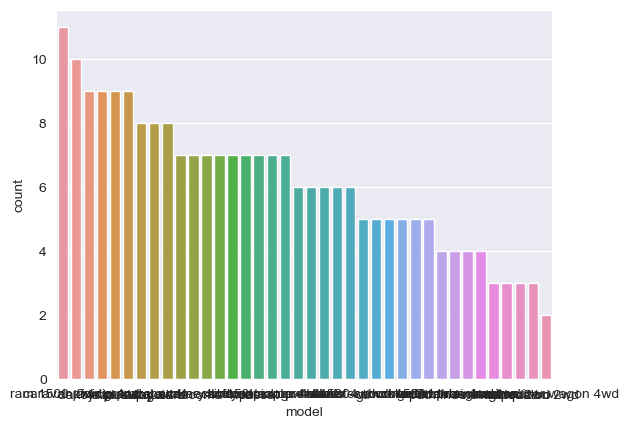

In [75]:
sns.countplot(data=mpg, x='model', order = mpg['model'].value_counts().index)

In [46]:
 mpg.query('category=="suv"').head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv


In [47]:
mpg.query('category=="suv"')\
    .groupby('manufacturer', as_index=False)\
    .agg(mean_cty = ('cty','mean'))

,manufacturer,mean_cty
0,chevrolet,12.666667
1,dodge,11.857143
2,ford,12.888889
3,jeep,13.500000
4,land rover,11.500000
5,lincoln,11.333333
6,mercury,13.250000
7,nissan,13.750000
8,subaru,18.833333
9,toyota,14.375000


In [76]:
economics = pd.read_csv('economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<AxesSubplot:xlabel='date', ylabel='unemploy'>

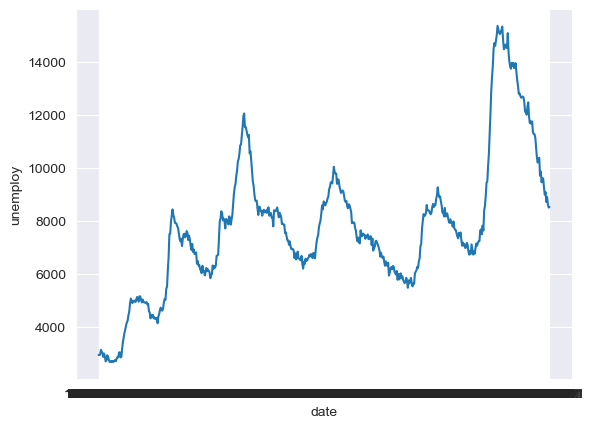

In [54]:
sns.set_style('darkgrid')
sns.lineplot(data=economics, x='date', y='unemploy')

In [60]:
economics['date2'] = pd.to_datetime(economics['date'])

In [61]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [62]:
economics[['date', 'date2']].head()

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01


In [63]:
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int64

In [64]:
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<AxesSubplot:xlabel='year', ylabel='unemploy'>

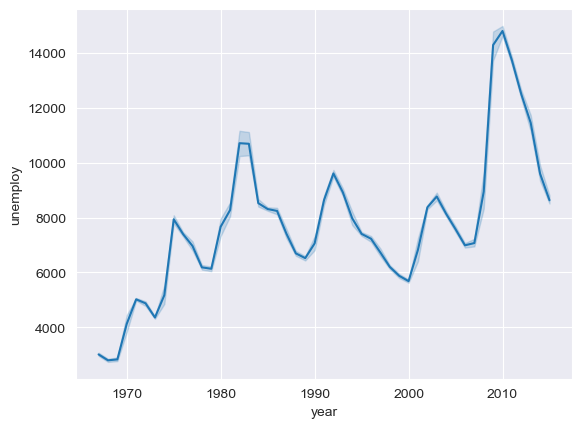

In [65]:
sns.lineplot(data=economics, x='year', y='unemploy')

In [66]:
economics.query('year==1982')['unemploy'].to_frame().describe()

,unemploy
count,12.000000
mean,10714.916667
std,856.415942
min,9397.000000
25%,10156.750000
50%,10693.500000
75%,11295.000000
max,12051.000000


<AxesSubplot:xlabel='year', ylabel='unemploy'>

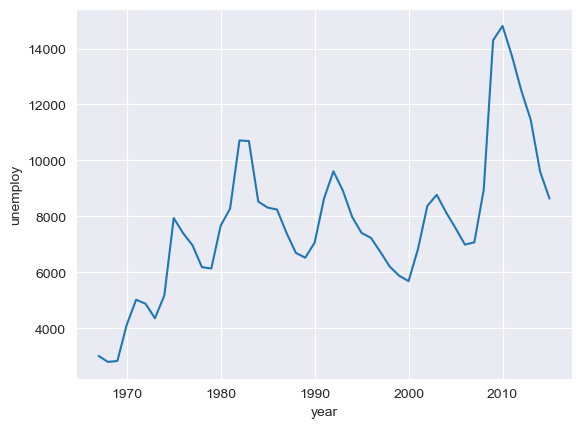

In [73]:
sns.lineplot(data = economics, x='year', y='unemploy', ci=None)

In [77]:
economics['date2'] = pd.to_datetime(economics['date'])

In [78]:
economics['year'] = economics['date2'].dt.year

In [79]:
economics.head(5)

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<AxesSubplot:xlabel='year', ylabel='psavert'>

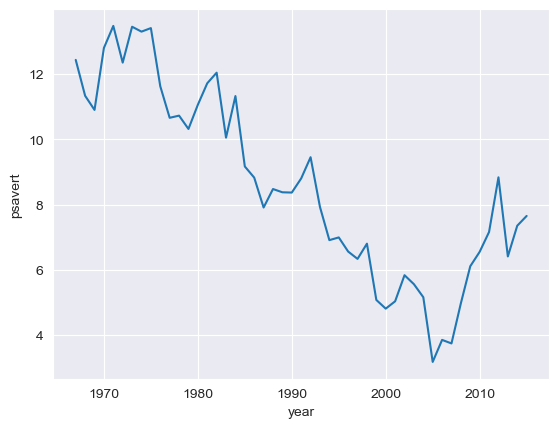

In [81]:
sns.lineplot(data=economics, x='year',y='psavert',ci=None)

<AxesSubplot:xlabel='drv', ylabel='hwy'>

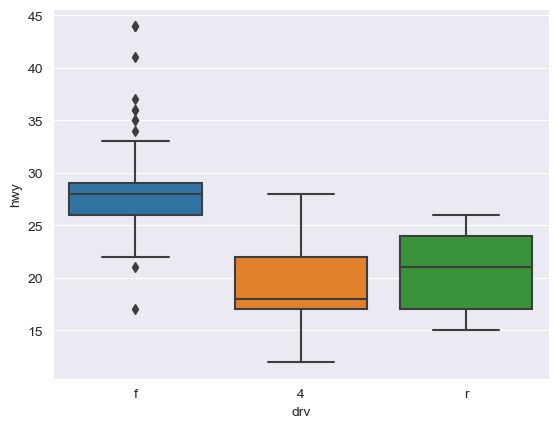

In [82]:
sns.boxplot(data=mpg, x='drv', y='hwy')